In [15]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
#%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# STUDY 1

### Import Study 1 data and run data preprocessing

In [16]:
# Load file (from same directory as the notebook)
df = pd.read_excel("../data/data63.xlsx")

#subset control condition
df_control = df.query('cond==1')
df_control

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
1,R_2ATgV5VxewrTRiI,usa,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,1.0,...,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222
17,R_1CjFxfgjU1coLqp,usa,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,100.0,100.0,100.0,100.0,100.0,...,4.0,NaN,"1,3,4,5,6,7",9.0,96.0,16.697,367.657,1,100.00,100.000000
21,R_qxty9a2HTTEq7Xb,usa,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,3.0,78.0,3.0,37.0,0.0,...,3.0,5.0,"2,3,4,5,6,7",6.0,76.0,24.055,79.902,8,30.25,66.444444
31,R_2QW2fJEzh1ev4fa,usa,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,45.0,49.0,50.0,47.0,NaN,...,3.0,1.0,"1,2,3,4,5,6,7",6.0,80.0,24.115,310.565,8,47.75,NaN
50,R_1Q0JBi1pA5p0kym,usa,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,56.0,57.0,51.0,55.0,53.0,...,2.0,4.0,"1,2,3,4,5,6,7",9.0,63.0,8.253,183.052,8,54.75,51.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59399,R_1db1dsU9anX3Iwf,vietnam,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,72.0,100.0,100.0,100.0,50.0,...,3.0,NaN,"1,2,4,5,6,7",7.0,80.0,5.195,189.709,8,93.00,82.888889
59416,R_3PFQCv3jEvnT5RD,vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,92.0,95.0,94.0,93.0,76.0,...,3.0,4.0,"1,2,3,4,5,6,7",7.0,90.0,11.888,206.495,8,93.50,79.222222
59417,R_2Qgs8q8dUPLjhcA,vietnam,1,Control,PolicySupport|SocialmediasharingPipedText|Beli...,89.0,100.0,100.0,100.0,35.0,...,3.0,NaN,NaN,NaN,NaN,6.190,166.433,2,97.25,71.111111
59433,R_3GwXA80Oate9obo,vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,100.0,100.0,100.0,100.0,100.0,...,3.0,2.0,"1,2,3,4,5,6,7",4.0,100.0,4.966,42.906,4,100.00,100.000000


In [17]:
#rename columns
df_control.rename(columns={
    'probe_CC_1': 'Climate_Change',
    'probe_GW_1': 'Global_Warming',
    'probe_GH_1': 'Global_Heating',
    'probe_CCrisis_1': 'Climate_Crisis',
    'probe_GE_1': 'Greenhouse_Effect',
    'probe_CE_1': 'Carbon_Emissions',
    'probe_CP_1': 'Greenhouse_Gasses',
    'probe_CEmerg_1': 'Climate_Emergency', 
    'probe_CPoll_1': 'Carbon_Pollution' 
}, inplace=True)

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_80128/4192289857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.rename(columns={


In [18]:
#remove columns that have no data for any of the 9 conditions

# List of columns to check for missing values
columns_to_check = ['Climate_Change', 'Global_Warming', 'Global_Heating', 'Climate_Crisis', 'Greenhouse_Effect', 'Carbon_Emissions', 'Greenhouse_Gasses', 'Climate_Emergency', 'Carbon_Pollution']

# Remove rows where all specified columns have missing values
df_control.dropna(subset=columns_to_check, how='all', inplace=True)

#515 rows were removed

/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_80128/3554411412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.dropna(subset=columns_to_check, how='all', inplace=True)


In [19]:
#transform the dataframe from wide format to long format

df_long = pd.melt(
    df_control.loc[:, ['ResponseId', 'Climate_Change', 'Global_Warming', 'Global_Heating', 'Climate_Crisis', 'Greenhouse_Effect', 'Carbon_Emissions', 'Greenhouse_Gasses', 'Climate_Emergency', 'Carbon_Pollution', 'Politics2_1', 'Politics2_9', 'Age', 'Country', 'BELIEFcc', 'Gender', 'Income', 'MacArthur_SES', 'Edu']],
    id_vars=["ResponseId", 'Politics2_1', 'Politics2_9','Age', 'Country', 'BELIEFcc', 'Gender', 'Income', 'MacArthur_SES','Edu'],
    var_name="Term",
#    value_name="willingness"
)
df_long

,ResponseId,Politics2_1,Politics2_9,Age,Country,BELIEFcc,Gender,Income,MacArthur_SES,Edu,Term,value
0,R_2ATgV5VxewrTRiI,87.0,72.0,39.0,usa,50.25,1.0,4.0,5.0,3.0,Climate_Change,NaN
1,R_1CjFxfgjU1coLqp,3.0,5.0,50.0,usa,100.00,2.0,NaN,9.0,4.0,Climate_Change,NaN
2,R_qxty9a2HTTEq7Xb,48.0,49.0,36.0,usa,30.25,1.0,5.0,6.0,3.0,Climate_Change,NaN
3,R_2QW2fJEzh1ev4fa,NaN,NaN,51.0,usa,47.75,1.0,1.0,6.0,3.0,Climate_Change,NaN
4,R_1Q0JBi1pA5p0kym,90.0,97.0,69.0,usa,54.75,2.0,4.0,9.0,2.0,Climate_Change,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41134,R_1db1dsU9anX3Iwf,9.0,12.0,20.0,vietnam,93.00,2.0,NaN,7.0,3.0,Carbon_Pollution,NaN
41135,R_3PFQCv3jEvnT5RD,46.0,48.0,28.0,vietnam,93.50,2.0,4.0,7.0,3.0,Carbon_Pollution,NaN
41136,R_2Qgs8q8dUPLjhcA,3.0,10.0,18.0,vietnam,97.25,2.0,NaN,NaN,3.0,Carbon_Pollution,NaN
41137,R_3GwXA80Oate9obo,100.0,100.0,25.0,vietnam,100.00,2.0,2.0,4.0,3.0,Carbon_Pollution,NaN


In [20]:
df_main = df_long[['ResponseId', 'Country', 'Term', 'value']]
df_main = df_main.dropna()
df_main

,ResponseId,Country,Term,value
21,R_2DOIoot2cvjJfuC,usa,Climate_Change,51.0
33,R_vlaPuaP0mFe2zYZ,usa,Climate_Change,92.0
34,R_25t48laTwXM7U1B,usa,Climate_Change,3.0
35,R_2zIMOv7xFuxptTJ,usa,Climate_Change,80.0
41,R_3soTptaePDqmDzA,usa,Climate_Change,100.0
...,...,...,...,...
41097,R_2w4SrYTCpwOTV1a,usa,Carbon_Pollution,73.0
41112,R_2aX3rZiymHXU8jU,vietnam,Carbon_Pollution,100.0
41119,R_bx6C2qHpml7w3rr,vietnam,Carbon_Pollution,71.0
41127,R_Y5BtwTC9yOO8Rxf,vietnam,Carbon_Pollution,29.0


# Experiment 2

### Import data and run data preprocessing

In [21]:
# Load file (from same directory as the notebook)
df2 = pd.read_excel("../data/TermsFollowup.xlsx")

In [22]:
# Keep only the rows where 'attentioncheck' equals 2
df2 = df2[df2['attentioncheck'] == 2]
df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,2.0,92.0,93.0,1.0,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses


In [23]:
#remove columns that have missing data for any of the 10 conditions
# List of columns to check for missing values
act_cols = ['Act_1', 'Act_1.1', 'Act_1.2', 'Act_1.3', 'Act_1.4', 'Act_1.5', 'Act_1.6', 'Act_1.7', 'Act_1.8','Act_1.9']
adv_cols = ['Advocacy_1', 'Advocacy_1.1', 'Advocacy_1.2', 'Advocacy_1.3', 'Advocacy_1.4', 'Advocacy_1.5', 'Advocacy_1.6', 'Advocacy_1.7', 'Advocacy_1.8','Advocacy_1.9']
policy_cols = ['Policy_1', 'Policy_1.1', 'Policy_1.2', 'Policy_1.3', 'Policy_1.4', 'Policy_1.5', 'Policy_1.6', 'Policy_1.7', 'Policy_1.8','Policy_1.9']
concern_cols = ['Concern_1', 'Concern_1.1', 'Concern_1.2', 'Concern_1.3', 'Concern_1.4', 'Concern_1.5', 'Concern_1.6', 'Concern_1.7', 'Concern_1.8', 'Concern_1.9']

# Remove rows where all specified columns have missing values
df2.dropna(subset=act_cols, how='all', inplace=True)
df2.dropna(subset=policy_cols, how='all', inplace=True)
df2.dropna(subset=concern_cols, how='all', inplace=True)

df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,2.0,92.0,93.0,1.0,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses


In [24]:
# Use a list comprehension to filter columns that start with 'Act'
act_columns = [col for col in df2.columns if col.startswith('Act')]
# Sum these columns
df2['Act'] = df2[act_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Advocacy'
adv_columns = [col for col in df2.columns if col.startswith('Advocacy')]
# Sum these columns
df2['Advocacy'] = df2[adv_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Policy'
policy_columns = [col for col in df2.columns if col.startswith('Policy')]
# Sum these columns
df2['Policy'] = df2[policy_columns].sum(axis=1)

# Use a list comprehension to filter columns that start with 'Concern'
concern_columns = [col for col in df2.columns if col.startswith('Concern')]
# Sum these columns
df2['Concern'] = df2[concern_columns].sum(axis=1)
df2.head()

,ResponseId,attentioncheck,Act_1,Advocacy_1,Policy_1,Concern_1,Act_1.1,Advocacy_1.1,Policy_1.1,Concern_1.1,...,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Comments_pilot,aid,C,Act,Advocacy,Policy,Concern
0,R_5nW0yPaLckBseiT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,4,6,7",7.0,81.0,NaN,6595a331-8951-593e-2b76-76f3a61770cc,CarbonPollution,50.0,5.0,50.0,51.0
1,R_5MSt2qIf0IghpDv,2,NaN,NaN,NaN,NaN,29.0,1.0,26.0,0.0,...,"5,6,7",4.0,51.0,No comments.,6595a356-8c8d-f682-4c9a-81ad0db4d987,ClimateCrisis,29.0,1.0,26.0,0.0
3,R_3ihARq0v66dTeba,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,2,3,5,6,7",7.0,89.0,Good questions,6595a32c-0fc2-3258-1dbe-79e08cfc17a9,ClimateEmergency,76.0,75.0,69.0,87.0
4,R_7US7EXTEqUDjlEB,2,NaN,NaN,NaN,NaN,19.0,9.0,8.0,0.0,...,"1,2,3,4,5,6,7",6.0,31.0,NaN,6595a314-febd-9269-4d8f-dcb746b92ba3,ClimateCrisis,19.0,9.0,8.0,0.0
5,R_34DlzqKarDdz9m2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,2,5,6,7",7.0,71.0,I enjoy the relative questions to the survey.,6595a381-e200-7444-993b-248a690d936b,GreenhouseGasses,89.0,39.0,84.0,100.0


In [25]:
# List of columns to be removed
columns_to_remove = [
    'Act_1', 'Advocacy_1', 'Policy_1', 'Concern_1', 
    'Act_1.1', 'Advocacy_1.1', 'Policy_1.1', 'Concern_1.1', 
    'Act_1.2', 'Advocacy_1.2', 'Policy_1.2', 'Concern_1.2', 
    'Act_1.3', 'Advocacy_1.3', 'Policy_1.3', 'Concern_1.3', 
    'Act_1.4', 'Advocacy_1.4', 'Policy_1.4', 'Concern_1.4', 
    'Act_1.5', 'Advocacy_1.5', 'Policy_1.5', 'Concern_1.5', 
    'Act_1.6', 'Advocacy_1.6', 'Policy_1.6', 'Concern_1.6', 
    'Act_1.7', 'Advocacy_1.7', 'Policy_1.7', 'Concern_1.7', 
    'Act_1.8', 'Advocacy_1.8', 'Policy_1.8', 'Concern_1.8', 
    'Act_1.9', 'Advocacy_1.9', 'Policy_1.9', 'Concern_1.9',
    'aid', 'attentioncheck', 'Gender_4_TEXT', 'Comments_pilot', 'PerceivedSciConsensu_1'
]

# Remove these columns
df2.drop(columns=columns_to_remove, inplace=True)
df2.head()

,ResponseId,Gender,Age,Education 2,Politics2_1,Politics2_9,Income,Indirect_SES,MacArthur_SES,C,Act,Advocacy,Policy,Concern
0,R_5nW0yPaLckBseiT,1.0,69.0,3.0,36.0,69.0,5.0,"3,4,6,7",7.0,CarbonPollution,50.0,5.0,50.0,51.0
1,R_5MSt2qIf0IghpDv,1.0,57.0,2.0,92.0,93.0,1.0,"5,6,7",4.0,ClimateCrisis,29.0,1.0,26.0,0.0
3,R_3ihARq0v66dTeba,1.0,67.0,3.0,23.0,33.0,4.0,"1,2,3,5,6,7",7.0,ClimateEmergency,76.0,75.0,69.0,87.0
4,R_7US7EXTEqUDjlEB,1.0,68.0,3.0,49.0,68.0,5.0,"1,2,3,4,5,6,7",6.0,ClimateCrisis,19.0,9.0,8.0,0.0
5,R_34DlzqKarDdz9m2,1.0,18.0,2.0,14.0,55.0,1.0,"1,2,5,6,7",7.0,GreenhouseGasses,89.0,39.0,84.0,100.0


# Figure

In [26]:
# copy df_main to a new dataframe df1 to preserve the original dataframe
df1 = df_main.copy()

# replace underscores in the values of the 'Term' column
df1['Term'] = df1['Term'].str.replace('_', '')
df1

,ResponseId,Country,Term,value
21,R_2DOIoot2cvjJfuC,usa,ClimateChange,51.0
33,R_vlaPuaP0mFe2zYZ,usa,ClimateChange,92.0
34,R_25t48laTwXM7U1B,usa,ClimateChange,3.0
35,R_2zIMOv7xFuxptTJ,usa,ClimateChange,80.0
41,R_3soTptaePDqmDzA,usa,ClimateChange,100.0
...,...,...,...,...
41097,R_2w4SrYTCpwOTV1a,usa,CarbonPollution,73.0
41112,R_2aX3rZiymHXU8jU,vietnam,CarbonPollution,100.0
41119,R_bx6C2qHpml7w3rr,vietnam,CarbonPollution,71.0
41127,R_Y5BtwTC9yOO8Rxf,vietnam,CarbonPollution,29.0


/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_80128/4166776684.py:21: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(y="Term", x="value", data=df1, orient="h", color=pal[0], join=False, order=order_1, ax=ax[0])
/var/folders/fc/7wb0sc1j2yzf4x35hn7xw9sm0000gq/T/ipykernel_80128/4166776684.py:26: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(y="C", x="Act", data=df2, orient="h", color=pal[0], join=False, order=order_2, ax=ax[1])


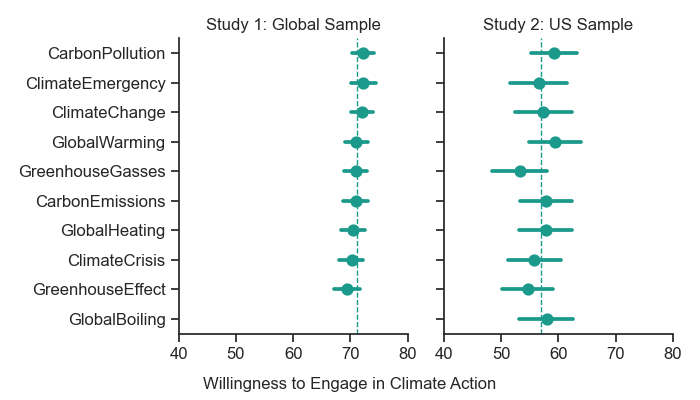

In [28]:
# Calculate the mean for each study
mean_value_df1 = df1['value'].mean()
mean_value_df2 = df2['Act'].mean()

# Setting the palette
pal = ["#1B998B"]

# Creating the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)  # Adjusted for two panels

# Sorting the terms based on mean willingness to act for df1
order_1 = df1.groupby("Term")['value'].mean().sort_values(ascending=False).index

# Add 'GlobalBoiling' to the order for Study 2 
if 'GlobalBoiling' not in order_1:
    order_2 = order_1.insert(len(order_1), 'GlobalBoiling')
else:
    order_2 = order_1

# Plot for Study 1
sns.pointplot(y="Term", x="value", data=df1, orient="h", color=pal[0], join=False, order=order_1, ax=ax[0])
ax[0].set_title("Study 1: Global Sample")
ax[0].set_ylabel("")

# Plot for Study 2
sns.pointplot(y="C", x="Act", data=df2, orient="h", color=pal[0], join=False, order=order_2, ax=ax[1])
ax[1].set_title("Study 2: US Sample")
ax[1].set_ylabel("")

# Set the x-axis scale for both plots
ax[0].set_xlim(40, 80)
ax[1].set_xlim(40, 80)

# Remove the individual x-labels
ax[0].set_xlabel("")
ax[1].set_xlabel("")

# Set a common x-label for the entire figure
fig.text(0.5, 0.04, 'Willingness to Engage in Climate Action', ha='center', va='center')

# Add vertical dotted line at the mean value for Study 1
ax[0].axvline(mean_value_df1, color='#1B998B', linestyle='--', linewidth=1)

# Add vertical dotted line at the mean value for Study 2
ax[1].axvline(mean_value_df2, color='#1B998B', linestyle='--', linewidth=1)

sns.despine()
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
#plt.savefig('Terms_MainFig.png', dpi=900, format="png")